In [ ]:
# default_exp laplante2009

# LaPlante et al 2009

> Full replication

This notebook reproduces every table in LaPlante et al's 2009 paper on poker player behaviour. To get started, download the raw data (*Sitting at the Virtual Poker Table*) from the link below from the transparency project's website;

- [Data Download (thetransparencyproject.org)](http://www.thetransparencyproject.org/download_index.php)
- [Original data description](http://www.thetransparencyproject.org/codebooks/DS4_codebook.pdf)
- [Original paper link](https://psycnet.apa.org/record/2009-06406-012)

File names: **DS4_Raw2_Aggregate_txt.txt** and **DS4_Analytic_txt.txt**

With the data downloaded, the first step is to import [*gamba*](https://github.com/gamba-dev/gamba), run the cell below to get started;

[![Flag](https://img.shields.io/badge/-FLAG-red?style=flat-square)](https://img.shields.io/badge/-FLAG-red?style=flat-square) Data description above mentions '*Eligibility for poker analysis*' as a variable in the daily aggregate data which is not present. This is not a fatal discrepency, and can be retrospectively added using player's existence in the analytical data set.

[![Flag](https://img.shields.io/badge/-FLAG-red?style=flat-square)](https://img.shields.io/badge/-FLAG-red?style=flat-square) Both the Cohen's d and K-S test results computed below differ from the original paper, this is likely due to differences in the ways these tests are computed or an undocumented data transformation (see third flag).

[![Flag](https://img.shields.io/badge/-FLAG-red?style=flat-square)](https://img.shields.io/badge/-FLAG-red?style=flat-square) Paper contains undocumented results - *df*, *t*, *df* (again), *p*, and *p(2-tailed)*. These are only referenced in the sentence '*Tests for differences between group means included testing the assumption of equal variances and, if necessary, adjusting for unequal variances.*`

In [ ]:
import gamba as gb

With [*gamba*](https://github.com/gamba-dev/gamba) ready, we need to load in both the analytic and raw data sets from the link above - we need both to make sure that the analytic data set is indeed a subset of the raw data set;

In [ ]:
raw_data = gb.data.read_csv('DS4_Raw2_Aggregate_txt.txt', delimiter='\t')
analytic_data = gb.data.read_csv('DS4_Analytic_txt.txt', delimiter='\t')
print('raw data loaded:', len(raw_data))
print('analytic data loaded:', len(analytic_data))

raw data loaded: 48114
analytic data loaded: 3445


Next, taking only the analytic data forward (for now), we can prepare the three subsets described in the paper (full set, most involved, not most involved);

In [ ]:
useful_columns = ['UserID','Duration','Total_sessions','Sessions_Per_Day','Euros_Per_Session','Total_wagered','Net_Loss','Percent_Lost']
all_study_data = analytic_data[useful_columns] # get only columns that are used in the analysis, then rename them to be compatable with gamba
all_study_data.columns = ['player_id','duration','total_sessions','sessions_per_day','euros_per_session','total_wagered','net_loss','percent_loss']

# now do the same for the 5-95 split of players performed in the study (using the 'Most_Involved_Group' column)
most_involved = analytic_data[analytic_data['Most_Involved_Group'] == 1]
most_involved = most_involved[useful_columns]
most_involved.columns = ['player_id','duration','total_sessions','sessions_per_day','euros_per_session','total_wagered','net_loss','percent_loss']

not_most_involved = analytic_data[analytic_data['Most_Involved_Group'] == 0]
not_most_involved = not_most_involved[useful_columns]
not_most_involved.columns = ['player_id','duration','total_sessions','sessions_per_day','euros_per_session','total_wagered','net_loss','percent_loss']

print('all players:', len(all_study_data))
print('most involved:', len(most_involved))
print('others 95 percent:', len(not_most_involved))

all players: 3445
most involved: 173
others 95 percent: 3272


These numbers are identical to those found in the paper, so at this stage we can be reasonably sure that the data extracted above is the same as that used in the original analysis. Using [*gamba*](https://github.com/gamba-dev/gamba) we can then reproduce each of the tables with the `descriptive_table` function, plus the `cohens_d` and `ks_test` functions...

In [ ]:
descriptive_df = gb.statistics.descriptive_table(all_study_data)
ks_table = gb.statistics.ks_test(all_study_data)
combined = gb.data.concat([descriptive_df, ks_table], axis=1)
display(combined)

majority_table = gb.statistics.descriptive_table(not_most_involved)
minority_table = gb.statistics.descriptive_table(most_involved)
display(majority_table, minority_table)

most_involved['most_involved'] = 1
not_most_involved['most_involved'] = 0
all_labelled_data = gb.data.concat([most_involved, not_most_involved])
cohens = gb.statistics.cohens_d(all_labelled_data, 'most_involved')
most_involved.drop(['most_involved'], axis=1, inplace=True)
display(cohens)

spearmans = gb.statistics.spearmans_r(all_study_data)
second_spearmans = gb.statistics.spearmans_r(most_involved)
display(spearmans)
display(second_spearmans)

,mean,std,median,K-S Score,p
duration,263.297242,231.765320,196.000000,0.962656,0.0
total_sessions,197.189550,376.112854,60.000000,0.999968,0.0
sessions_per_day,1.141501,1.639888,0.560976,0.502543,0.0
euros_per_session,34.822931,186.660876,13.150878,0.965538,0.0
total_wagered,8684.051892,83583.345565,807.989800,0.999706,0.0
net_loss,587.460887,3018.728832,110.659371,0.873454,0.0
percent_loss,0.239377,0.294077,0.204473,0.424153,0.0


,mean,std,median
duration,249.192848,225.160554,181.000000
total_sessions,151.582213,256.414753,52.000000
sessions_per_day,1.084689,1.607911,0.506123
euros_per_session,24.473024,45.616327,12.323661
total_wagered,2736.739945,4784.441999,703.815150
net_loss,465.789054,1210.518983,105.846000
percent_loss,0.248375,0.297668,0.214518


,mean,std,median
duration,530.057803,189.896505,565.000000
total_sessions,1059.774566,891.173874,818.000000
sessions_per_day,2.216007,1.859378,1.616105
euros_per_session,230.573760,785.814580,88.660873
total_wagered,121167.315999,355037.671438,55012.673500
net_loss,2888.676138,12206.189893,1941.010535
percent_loss,0.069203,0.126085,0.033964


,Cohen's d
duration,-1.256492
total_sessions,-2.841726
sessions_per_day,-0.697742
euros_per_session,-1.137564
total_wagered,-1.489859
net_loss,-0.815126
percent_loss,0.614648


,duration,total_sessions,sessions_per_day,euros_per_session,total_wagered,net_loss,percent_loss
duration,-,,,,,,
total_sessions,0.62**,-,,,,,
sessions_per_day,-0.38**,0.37**,-,,,,
euros_per_session,0.12**,0.09**,-0.03,-,,,
total_wagered,0.56**,0.85**,0.29**,0.57**,-,,
net_loss,0.31**,0.44**,0.1**,0.42**,0.59**,-,
percent_loss,-0.23**,-0.41**,-0.18**,-0.07**,-0.36**,0.36**,-


,duration,total_sessions,sessions_per_day,euros_per_session,total_wagered,net_loss,percent_loss
duration,-,,,,,,
total_sessions,0.34**,-,,,,,
sessions_per_day,-0.22**,0.76**,-,,,,
euros_per_session,-0.21**,-0.74**,-0.58**,-,,,
total_wagered,0.09,0.07,-0.01,0.55**,-,,
net_loss,-0,-0,0.03,-0.13,-0.17*,-,
percent_loss,-0.03,0,0.08,-0.18*,-0.28**,0.95**,-


That's it! The tables found in the paper can be recreated from those above - minus a *df*, *t*, *p*, and *p(2-tailed)* column which are not described in the text.

This short population-level descriptive analysis lays the foundation for work in other areas/with other providers. For more examples of reproducability using [*gamba*](https://github.com/gamba-dev/gamba), visit [the github repo](https://github.com/gamba-dev/gamba) or click through the replications tab on the left.

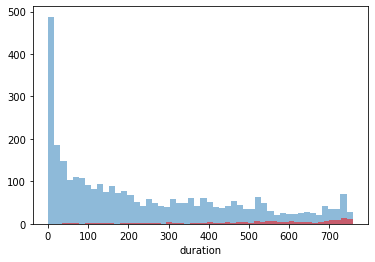

In [ ]:
# so why is Cohen's d so large?
measure = 'duration'
control = not_most_involved[measure].values
experimental = most_involved[measure].values

import matplotlib.pyplot as plt
plt.figure()
plt.hist(control, alpha=0.5, bins=50)
plt.hist(experimental, color='red', alpha=0.5, bins=50)
plt.xlabel(measure)
plt.show()